## Model to Identify Plant Leaves

## Abstract
This project focuses on developing an automated system for identifying various species of leaves using the Xception model, a deep learning architecture known for its efficiency in image classification tasks. The model is trained on a diverse dataset of plant leaves to enhance accuracy and reliability.

## Introduction
With the increasing interest in plant biodiversity, the need for automated identification systems has become paramount. This project aims to leverage advanced machine learning techniques to accurately classify plant leaves based on image data.

## Project Overview
- **Objective**: To create a robust system capable of identifying and classifying leaf species from images.
- **Dataset**: The dataset comprises images of 83 different leaf species, totaling over 7,000 images.
- **Model Architecture**: The Xception model is utilized due to its superior performance in handling image data through depthwise separable convolutions.

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    '//content//drive//MyDrive//LEAFLENS//Medicinal Leaf dataset',
    shuffle=True,
    batch_size=32,
    image_size=(299, 299),
)

labels = dataset.class_names
print(labels)


Found 6966 files belonging to 80 classes.
['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemongrass', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin', 'Raddish', 'Rose', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'ashoka', 'camphor', 'kamakasturi', 'kepala']


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dataset Description
- The dataset consists of images sourced from various botanical collections.
- Each class corresponds to a specific leaf species, facilitating supervised learning.

In [8]:
import numpy as np

for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())
    break

(32, 299, 299, 3)
[56 70 41 69 40 12 25 55 72 64  8 18 74 24 52 69 11 20 24 32 74 16 27 34
 74 32  7  6 13 32 38 67]


In [9]:
# train test split
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = int(0.1 * len(dataset))
train_size, val_size, test_size

(174, 21, 21)

In [10]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split + test_split) == 1, "Splits must add up to 1!"

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)  # Shuffle the dataset before splitting

    train_size = int(train_split * len(ds))
    val_size = int(val_split * len(ds))

    train_ds = ds.take(train_size)  # First part goes to training
    remaining = ds.skip(train_size)  # Skip training data

    val_ds = remaining.take(val_size)  # Next part goes to validation
    test_ds = remaining.skip(val_size)  # Remaining data goes to test

    return train_ds, val_ds, test_ds


In [11]:

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
len(train_ds), len(val_ds), len(test_ds)

(174, 21, 23)

In [12]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(299, 299),
    tf.keras.layers.Rescaling(1./255)
])

In [13]:
# train using Xception
base_model = tf.keras.applications.Xception(
    weights='imagenet',
    input_shape=(299, 299, 3),
    include_top=False,
    pooling='avg',
    classifier_activation='softmax',
    classes=len(labels)
)

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


## Model Architecture
### Xception Model Overview
The Xception model is an advanced deep learning architecture based on the Inception model, characterized by its use of depthwise separable convolutions, which improve model performance while reducing computational costs.

In [14]:
base_model.trainable = False

inputs = tf.keras.Input(shape=(299, 299, 3))
x = resize_and_rescale(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(labels), activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    train_ds,
    validation_data=val_ds,
    batch_size=32,
    epochs=25
)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 299, 299, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 2048)                │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 80)                  │          10,320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,134,072 (80.62 MB)

 Trainable params: 272,592 (1.04 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 483s 333ms/step - accuracy: 0.1201 - loss: 3.9200 - val_accuracy: 0.5580 - val_loss: 2.0862
Epoch 2/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 66s 206ms/step - accuracy: 0.4806 - loss: 2.1622 - val_accuracy: 0.7054 - val_loss: 1.3789
Epoch 3/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 65s 204ms/step - accuracy: 0.6302 - loss: 1.4788 - val_accuracy: 0.8006 - val_loss: 0.9346
Epoch 4/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 66s 206ms/step - accuracy: 0.7131 - loss: 1.1338 - val_accuracy: 0.8631 - val_loss: 0.7053
Epoch 5/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 66s 206ms/step - accuracy: 0.7557 - loss: 0.9141 - val_accuracy: 0.8780 - val_loss: 0.5629
Epoch 6/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 66s 206ms/step - accuracy: 0.8077 - loss: 0.7559 - val_accuracy: 0.9271 - val_loss: 0.4327
Epoch 7/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 66s 206ms/step - accuracy: 0.8373 - loss: 0.6342 - val_accuracy: 0.9286 - val_loss: 0.3586
Epoch 8/25
174/174 ━━━━━━━━━━━━━━━━━━━━ 66s 206ms/step - accuracy: 0.8622 - loss: 

In [15]:
model.evaluate(test_ds)

23/23 ━━━━━━━━━━━━━━━━━━━━ 31s 29ms/step - accuracy: 0.9994 - loss: 0.0295


[0.030085233971476555, 0.998641312122345]

## Testing the Model with Known Data

### Objective
The purpose of this section is to evaluate the performance of the trained Xception model on a test dataset containing images of leaves whose species are already known. This evaluation helps assess the model's accuracy and reliability in real-world scenarios.


In [16]:
# predict with new images
import numpy as np

img = tf.keras.preprocessing.image.load_img(
    '//content//drive//MyDrive//LEAFLENS//Medicinal Leaf dataset/Neem/1004.jpg', target_size=(299, 299)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch


predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
This image most likely belongs to Neem with a 72.44 percent confidence.


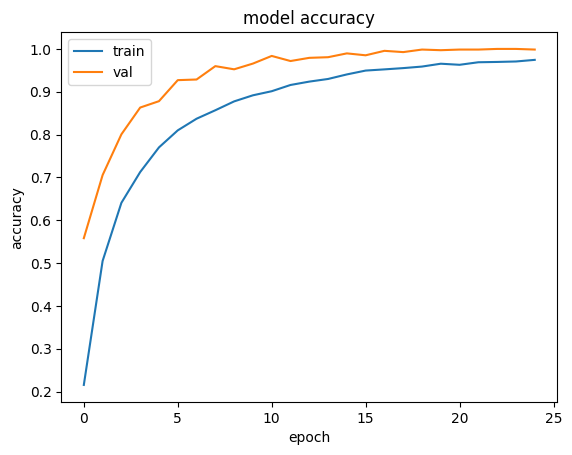

In [17]:
# plot accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Saving the Model
After training the Xception model, it is essential to save the model's architecture, weights, and training configuration for future use, such as inference, further training, or deployment. This section outlines the methods for saving the model using TensorFlow/Keras.


In [19]:
model.save('xception_model.keras')

### Conclusion
Saving the model and its weights allows for efficient use of the trained model in future applications. By following the methods outlined in this section, you can ensure that your model is preserved and easily retrievable for later use, whether for inference or continued training.

We will integrate this model with a camera module to enable real-time identification of leaves, enhancing its practical applications in biodiversity research and education.
